In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/miniconda/lib/python3.11/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.4)
  from scipy.stats import gaussian_kde


In [16]:
# 读取数据
file_path = 'ebd_NZ_soiwre1_smp_relAug-2024.txt'
data = pd.read_csv(file_path, sep='\t')  # 根据文件的分隔符进行调整

In [17]:
# 查看前几行
print(data.head())

                         GLOBAL UNIQUE IDENTIFIER            LAST EDITED DATE  \
0  URN:CornellLabOfOrnithology:EBIRD:OBS148129021         2020-07-29 13:31:25   
1  URN:CornellLabOfOrnithology:EBIRD:OBS148129405         2020-07-29 13:31:47   
2  URN:CornellLabOfOrnithology:EBIRD:OBS148129441         2020-07-29 13:31:47   
3  URN:CornellLabOfOrnithology:EBIRD:OBS148129563         2020-07-29 13:31:47   
4  URN:CornellLabOfOrnithology:EBIRD:OBS191886336  2024-04-18 08:36:10.936029   

   TAXONOMIC ORDER CATEGORY  TAXON CONCEPT ID        COMMON NAME  \
0            12976  species  avibase-19420218  South Island Wren   
1            12976  species  avibase-19420218  South Island Wren   
2            12976  species  avibase-19420218  South Island Wren   
3            12976  species  avibase-19420218  South Island Wren   
4            12976  species  avibase-19420218  South Island Wren   

        SCIENTIFIC NAME  SUBSPECIES COMMON NAME  SUBSPECIES SCIENTIFIC NAME  \
0  Xenicus gilviventris  

In [18]:
# Checking the number of unique LATITUDE values in the 'data' DataFrame
unique_latitudes_data = data['LATITUDE'].nunique()
print(f"Number of unique LATITUDE values: {unique_latitudes_data}")

Number of unique LATITUDE values: 1772


In [19]:
# 查看数据类型和缺失值
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102 entries, 0 to 4101
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GLOBAL UNIQUE IDENTIFIER    4102 non-null   object 
 1   LAST EDITED DATE            4102 non-null   object 
 2   TAXONOMIC ORDER             4102 non-null   int64  
 3   CATEGORY                    4102 non-null   object 
 4   TAXON CONCEPT ID            4102 non-null   object 
 5   COMMON NAME                 4102 non-null   object 
 6   SCIENTIFIC NAME             4102 non-null   object 
 7   SUBSPECIES COMMON NAME      0 non-null      float64
 8   SUBSPECIES SCIENTIFIC NAME  0 non-null      float64
 9   EXOTIC CODE                 0 non-null      float64
 10  OBSERVATION COUNT           4102 non-null   object 
 11  BREEDING CODE               107 non-null    object 
 12  BREEDING CATEGORY           107 non-null    object 
 13  BEHAVIOR CODE               107 n

In [20]:
# 查看 'COMMON NAME' 列的唯一值
unique_common_names = data['COMMON NAME'].unique()
print(unique_common_names)

['South Island Wren']


In [21]:
# 查看 'COUNTY' 列的唯一值
unique_counties = data['COUNTRY'].unique()
print("Unique Counties:")
print(unique_counties)

# 查看 'COUNTY CODE' 列的唯一值
unique_county_codes = data['COUNTRY CODE'].unique()
print("\nUnique County Codes:")
print(unique_county_codes)

Unique Counties:
['New Zealand']

Unique County Codes:
['NZ']


In [22]:
# 查看统计信息
print(data.describe())

       TAXONOMIC ORDER  SUBSPECIES COMMON NAME  SUBSPECIES SCIENTIFIC NAME  \
count           4102.0                     0.0                         0.0   
mean           12976.0                     NaN                         NaN   
std                0.0                     NaN                         NaN   
min            12976.0                     NaN                         NaN   
25%            12976.0                     NaN                         NaN   
50%            12976.0                     NaN                         NaN   
75%            12976.0                     NaN                         NaN   
max            12976.0                     NaN                         NaN   

       EXOTIC CODE  BCR CODE  USFWS CODE     LATITUDE    LONGITUDE  \
count          0.0       0.0         0.0  4102.000000  4102.000000   
mean           NaN       NaN         NaN   -44.064134   169.237627   
std            NaN       NaN         NaN     1.086275     1.609532   
min            Na

In [23]:
# 指定要保留的列
columns_to_keep = [
    'COMMON NAME',
    'OBSERVATION COUNT',
    'AGE/SEX',
    'STATE',
    'STATE CODE',
    'COUNTY',
    'COUNTY CODE',
    'IBA CODE',
    'BCR CODE',
    'LOCALITY',
    'LOCALITY ID',
    'LOCALITY TYPE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
    'EFFORT AREA HA',
    'GROUP IDENTIFIER',
    'APPROVED',
    'SPECIES COMMENTS'
]

# 清理数据，只保留指定的列
cleaned_data = data[columns_to_keep]

# 查看清理后的数据
print(cleaned_data.head())

         COMMON NAME OBSERVATION COUNT AGE/SEX       STATE STATE CODE  \
0  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
1  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
2  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
3  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
4  South Island Wren                 1     NaN  Canterbury     NZ-CAN   

             COUNTY COUNTY CODE IBA CODE  BCR CODE  \
0  Hurunui District  NZ-CAN-058      NaN       NaN   
1  Hurunui District  NZ-CAN-058      NaN       NaN   
2  Hurunui District  NZ-CAN-058      NaN       NaN   
3  Hurunui District  NZ-CAN-058      NaN       NaN   
4  Hurunui District  NZ-CAN-058      NaN       NaN   

                                            LOCALITY LOCALITY ID  \
0  Edwards Valley, gullies on west side above bus...    L1491033   
1   Close to lake Thompson, Head of the Waiau Valley    L1491411   
2  Technical/ Norma ridge, 4200'

In [24]:
# Checking the number of unique LATITUDE values in the 'data' DataFrame
unique_latitudes_data = cleaned_data['LATITUDE'].nunique()
print(f"Number of unique LATITUDE values: {unique_latitudes_data}")


Number of unique LATITUDE values: 1772


In [25]:
# 检查缺失值
missing_values = cleaned_data.isnull().sum()
print(missing_values)

# 根据需要填补或删除缺失值
# data = data.dropna()  # 删除缺失值
# data.fillna(value=0, inplace=True)  # 填补缺失值

COMMON NAME             0
OBSERVATION COUNT       0
AGE/SEX              4046
STATE                   0
STATE CODE              0
COUNTY                 78
COUNTY CODE            78
IBA CODE             4082
BCR CODE             4102
LOCALITY                0
LOCALITY ID             0
LOCALITY TYPE           0
LATITUDE                0
LONGITUDE               0
OBSERVATION DATE        0
EFFORT AREA HA       4099
GROUP IDENTIFIER     3707
APPROVED                0
SPECIES COMMENTS     2684
dtype: int64


In [26]:
import pandas as pd

# 假设 cleaned_data 是之前清理后的 DataFrame

# 1. 保留 GROUP IDENTIFIER 没有值的行
missing_group = cleaned_data[cleaned_data['GROUP IDENTIFIER'].isnull()]

# 2. 找出 GROUP IDENTIFIER 有值的行，但每种重复的值只保留一个
unique_group = cleaned_data[cleaned_data['GROUP IDENTIFIER'].notnull()].drop_duplicates(subset='GROUP IDENTIFIER')

# 3. 合并两个 DataFrame，形成新的 DataFrame
final_data = pd.concat([missing_group, unique_group], ignore_index=True)

# 查看结果
print(final_data)

            COMMON NAME OBSERVATION COUNT AGE/SEX       STATE STATE CODE  \
0     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
1     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
2     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
3     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
4     South Island Wren                 1     NaN  Canterbury     NZ-CAN   
...                 ...               ...     ...         ...        ...   
3849  South Island Wren                 2     NaN  West Coast     NZ-WTC   
3850  South Island Wren                 1     NaN  West Coast     NZ-WTC   
3851  South Island Wren                 2     NaN  West Coast     NZ-WTC   
3852  South Island Wren                 3     NaN  West Coast     NZ-WTC   
3853  South Island Wren                 5     NaN  West Coast     NZ-WTC   

                 COUNTY COUNTY CODE IBA CODE  BCR CODE  \
0      Hurunui District  NZ-C

In [27]:
# Checking the number of unique LATITUDE values in the 'data' DataFrame
unique_latitudes_data = final_data['LATITUDE'].nunique()
print(f"Number of unique LATITUDE values: {unique_latitudes_data}")

Number of unique LATITUDE values: 1772


In [28]:
# 保留 APPROVED 列是 1 的行
filtered_final_data = final_data[final_data['APPROVED'] == 1]

# 查看结果
print(filtered_final_data)

            COMMON NAME OBSERVATION COUNT AGE/SEX       STATE STATE CODE  \
0     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
1     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
2     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
3     South Island Wren                 X     NaN  Canterbury     NZ-CAN   
4     South Island Wren                 1     NaN  Canterbury     NZ-CAN   
...                 ...               ...     ...         ...        ...   
3849  South Island Wren                 2     NaN  West Coast     NZ-WTC   
3850  South Island Wren                 1     NaN  West Coast     NZ-WTC   
3851  South Island Wren                 2     NaN  West Coast     NZ-WTC   
3852  South Island Wren                 3     NaN  West Coast     NZ-WTC   
3853  South Island Wren                 5     NaN  West Coast     NZ-WTC   

                 COUNTY COUNTY CODE IBA CODE  BCR CODE  \
0      Hurunui District  NZ-C

In [29]:
# Checking the number of unique LATITUDE values in the 'data' DataFrame
unique_latitudes_data = filtered_final_data['LATITUDE'].nunique()
print(f"Number of unique LATITUDE values: {unique_latitudes_data}")

Number of unique LATITUDE values: 1772


In [30]:
# 方法1：使用 shape 属性
num_rows = filtered_final_data.shape[0]
print(f"行数: {num_rows}")

行数: 3854


In [31]:
print(filtered_final_data.head())

         COMMON NAME OBSERVATION COUNT AGE/SEX       STATE STATE CODE  \
0  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
1  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
2  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
3  South Island Wren                 X     NaN  Canterbury     NZ-CAN   
4  South Island Wren                 1     NaN  Canterbury     NZ-CAN   

             COUNTY COUNTY CODE IBA CODE  BCR CODE  \
0  Hurunui District  NZ-CAN-058      NaN       NaN   
1  Hurunui District  NZ-CAN-058      NaN       NaN   
2  Hurunui District  NZ-CAN-058      NaN       NaN   
3  Hurunui District  NZ-CAN-058      NaN       NaN   
4  Hurunui District  NZ-CAN-058      NaN       NaN   

                                            LOCALITY LOCALITY ID  \
0  Edwards Valley, gullies on west side above bus...    L1491033   
1   Close to lake Thompson, Head of the Waiau Valley    L1491411   
2  Technical/ Norma ridge, 4200'

In [32]:
# 检查缺失值
missing_values_filtered_final_data = (filtered_final_data.isnull().sum())
print(missing_values_filtered_final_data)

# 根据需要填补或删除缺失值
# data = data.dropna()  # 删除缺失值
# data.fillna(value=0, inplace=True)  # 填补缺失值

COMMON NAME             0
OBSERVATION COUNT       0
AGE/SEX              3818
STATE                   0
STATE CODE              0
COUNTY                 76
COUNTY CODE            76
IBA CODE             3837
BCR CODE             3854
LOCALITY                0
LOCALITY ID             0
LOCALITY TYPE           0
LATITUDE                0
LONGITUDE               0
OBSERVATION DATE        0
EFFORT AREA HA       3851
GROUP IDENTIFIER     3707
APPROVED                0
SPECIES COMMENTS     2537
dtype: int64


In [33]:
# 删除指定的列
filtered_final_data = filtered_final_data.drop(columns=['AGE/SEX', 'IBA CODE', 'BCR CODE', 'EFFORT AREA HA'])

# 查看结果
print(filtered_final_data.head())

         COMMON NAME OBSERVATION COUNT       STATE STATE CODE  \
0  South Island Wren                 X  Canterbury     NZ-CAN   
1  South Island Wren                 X  Canterbury     NZ-CAN   
2  South Island Wren                 X  Canterbury     NZ-CAN   
3  South Island Wren                 X  Canterbury     NZ-CAN   
4  South Island Wren                 1  Canterbury     NZ-CAN   

             COUNTY COUNTY CODE  \
0  Hurunui District  NZ-CAN-058   
1  Hurunui District  NZ-CAN-058   
2  Hurunui District  NZ-CAN-058   
3  Hurunui District  NZ-CAN-058   
4  Hurunui District  NZ-CAN-058   

                                            LOCALITY LOCALITY ID  \
0  Edwards Valley, gullies on west side above bus...    L1491033   
1   Close to lake Thompson, Head of the Waiau Valley    L1491411   
2  Technical/ Norma ridge, 4200'-5300', alpine sc...    L1491447   
3                          Mt. Gloriana, Spencer Mts    L1491580   
4                                       rock bivouac    L2

In [34]:
# Checking the number of unique LATITUDE values in the 'data' DataFrame
unique_latitudes_data = filtered_final_data['LATITUDE'].nunique()
print(f"Number of unique LATITUDE values: {unique_latitudes_data}")

Number of unique LATITUDE values: 1772


In [35]:
print(filtered_final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COMMON NAME        3854 non-null   object 
 1   OBSERVATION COUNT  3854 non-null   object 
 2   STATE              3854 non-null   object 
 3   STATE CODE         3854 non-null   object 
 4   COUNTY             3778 non-null   object 
 5   COUNTY CODE        3778 non-null   object 
 6   LOCALITY           3854 non-null   object 
 7   LOCALITY ID        3854 non-null   object 
 8   LOCALITY TYPE      3854 non-null   object 
 9   LATITUDE           3854 non-null   float64
 10  LONGITUDE          3854 non-null   float64
 11  OBSERVATION DATE   3854 non-null   object 
 12  GROUP IDENTIFIER   147 non-null    object 
 13  APPROVED           3854 non-null   int64  
 14  SPECIES COMMENTS   1317 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 451.8+ KB
None


/tmp/ipykernel_3309932/595511012.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


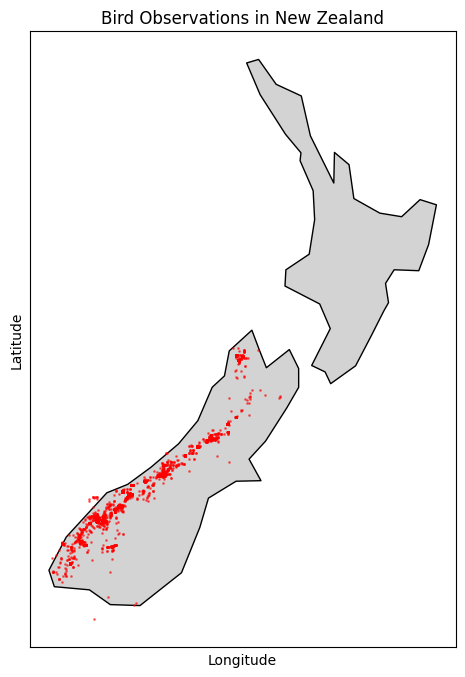

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load world map data and filter for New Zealand
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nz = world[world.name == "New Zealand"]

# Convert filtered_final_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_final_data, 
    geometry=gpd.points_from_xy(filtered_final_data.LONGITUDE, filtered_final_data.LATITUDE),
    crs="EPSG:4326"
)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot New Zealand map
nz.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot observation points
gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5)

# Set plot title and labels
plt.title('Bird Observations in New Zealand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

In [37]:
import pandas as pd

# 假设你已经加载了数据到 filtered_final_data
# 检查 OBSERVATION DATE 列的范围
date_range = filtered_final_data['OBSERVATION DATE'].agg(['min', 'max'])

print("OBSERVATION DATE 范围:")
print(date_range)

OBSERVATION DATE 范围:
min    1912-04-01
max    2024-06-04
Name: OBSERVATION DATE, dtype: object


/tmp/ipykernel_3309932/4020302004.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


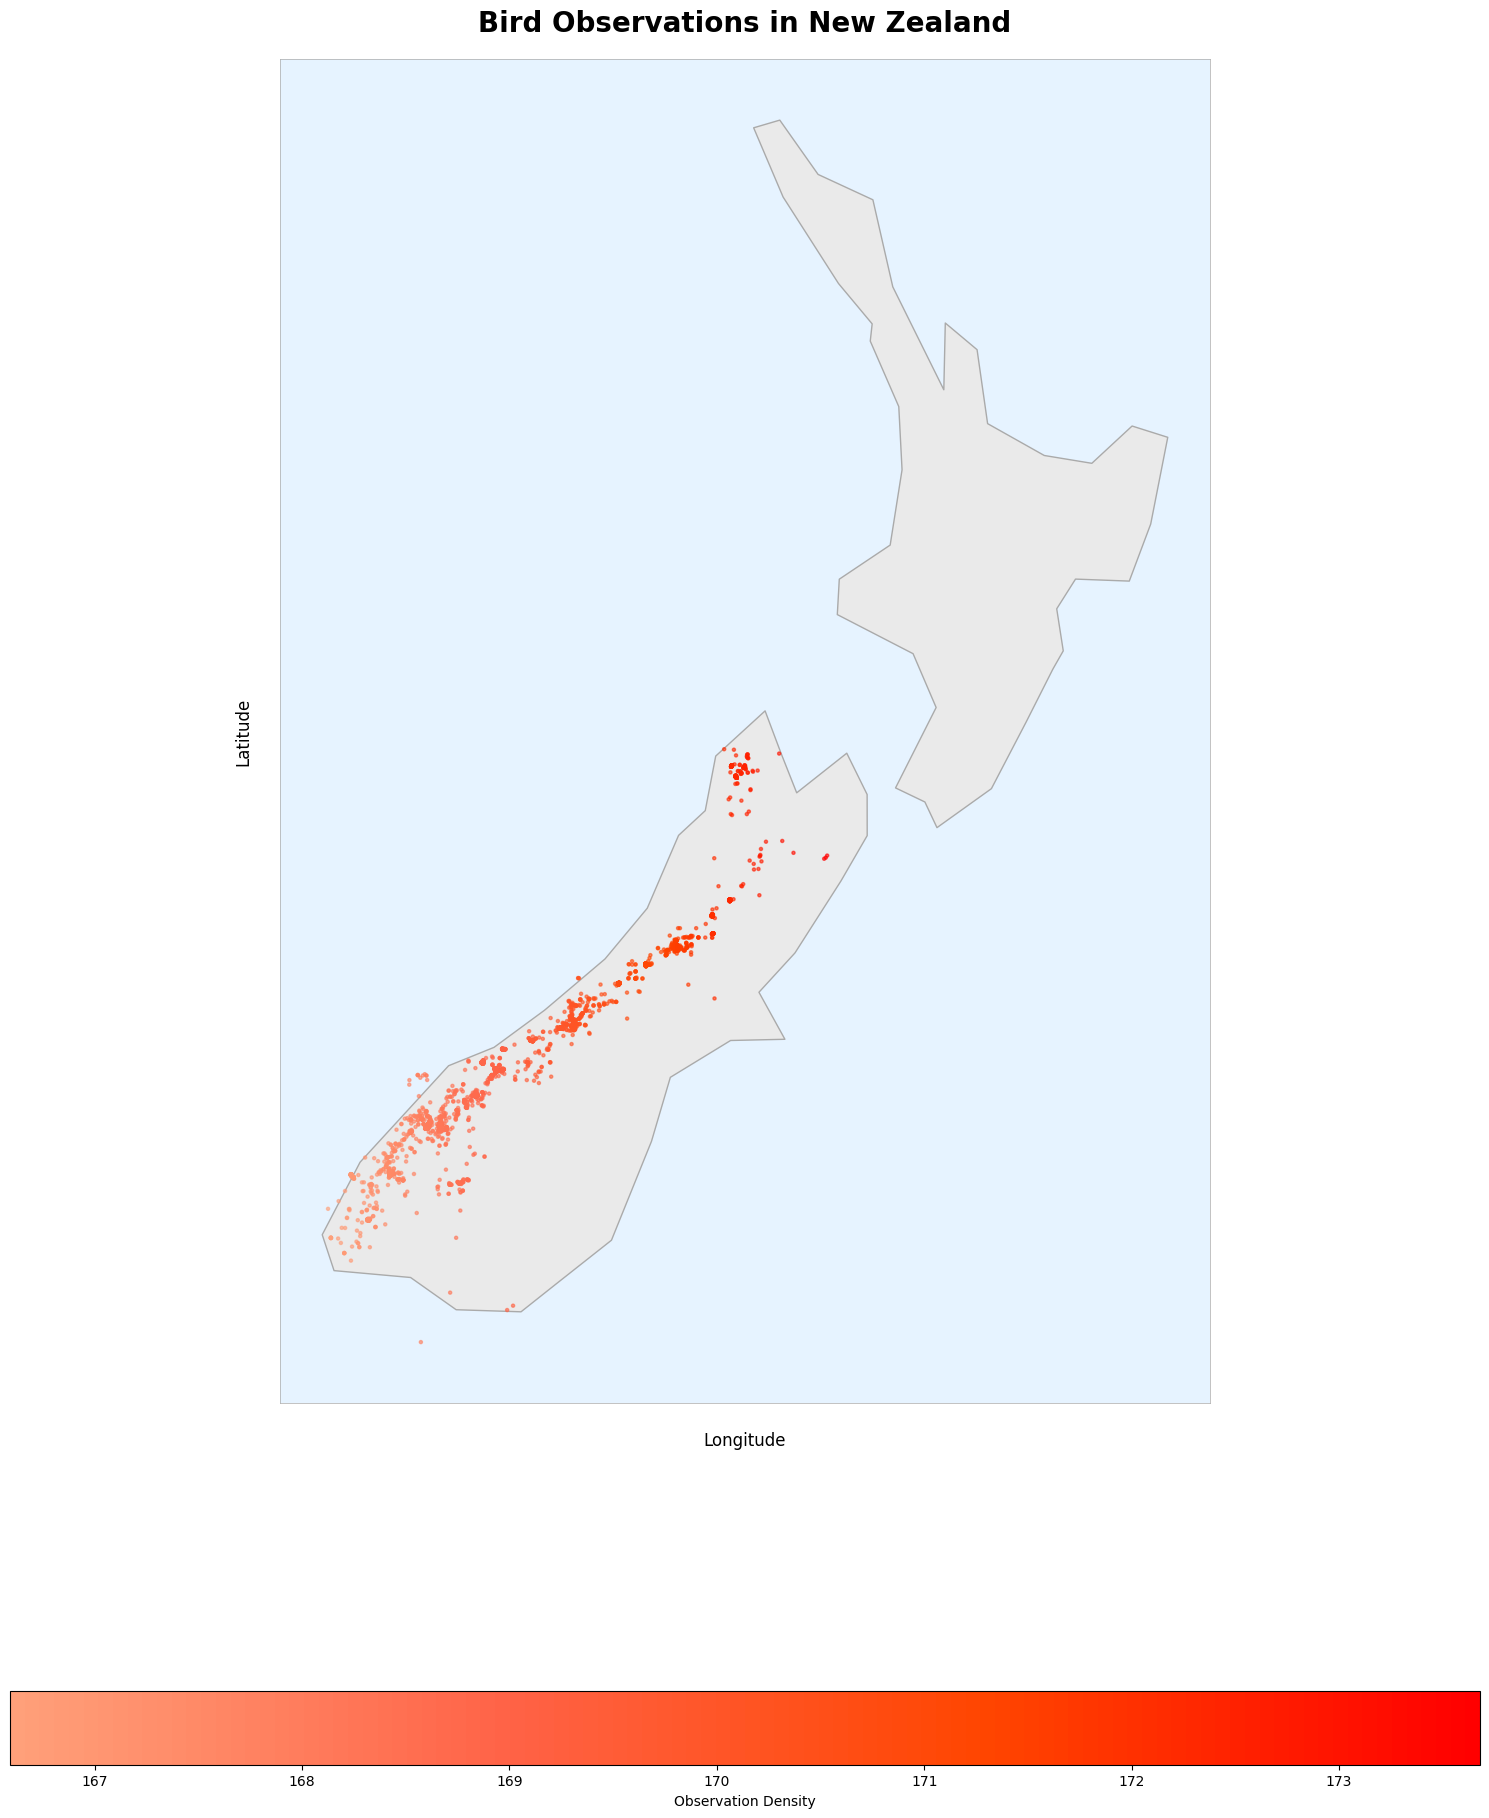

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Load world map data and filter for New Zealand
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nz = world[world.name == "New Zealand"]

# Convert filtered_final_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_final_data, 
    geometry=gpd.points_from_xy(filtered_final_data.LONGITUDE, filtered_final_data.LATITUDE),
    crs="EPSG:4326"
)

# Create custom color map for points
colors = ["#FFA07A", "#FF6347", "#FF4500", "#FF0000"]  # Light salmon to red
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 20))

# Set background color for water
ax.set_facecolor("#E6F3FF")  # Light blue for water

# Plot New Zealand map
nz.plot(ax=ax, color='#EAEAEA', edgecolor='#AAAAAA')

# Plot observation points with color gradient based on density
gdf.plot(ax=ax, alpha=0.6, markersize=5, cmap=cmap, legend=True, 
         legend_kwds={'label': "Observation Density", 'orientation': "horizontal"},
         column=gdf.geometry.x)  # Using x coordinate for demo; ideally use actual density

# Set plot title and labels
plt.title('Bird Observations in New Zealand', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Longitude', fontsize=12, labelpad=20)
plt.ylabel('Latitude', fontsize=12, labelpad=20)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Add a thin border around the map
for spine in ax.spines.values():
    spine.set_edgecolor('#AAAAAA')
    spine.set_linewidth(0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3309932/1445617994.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


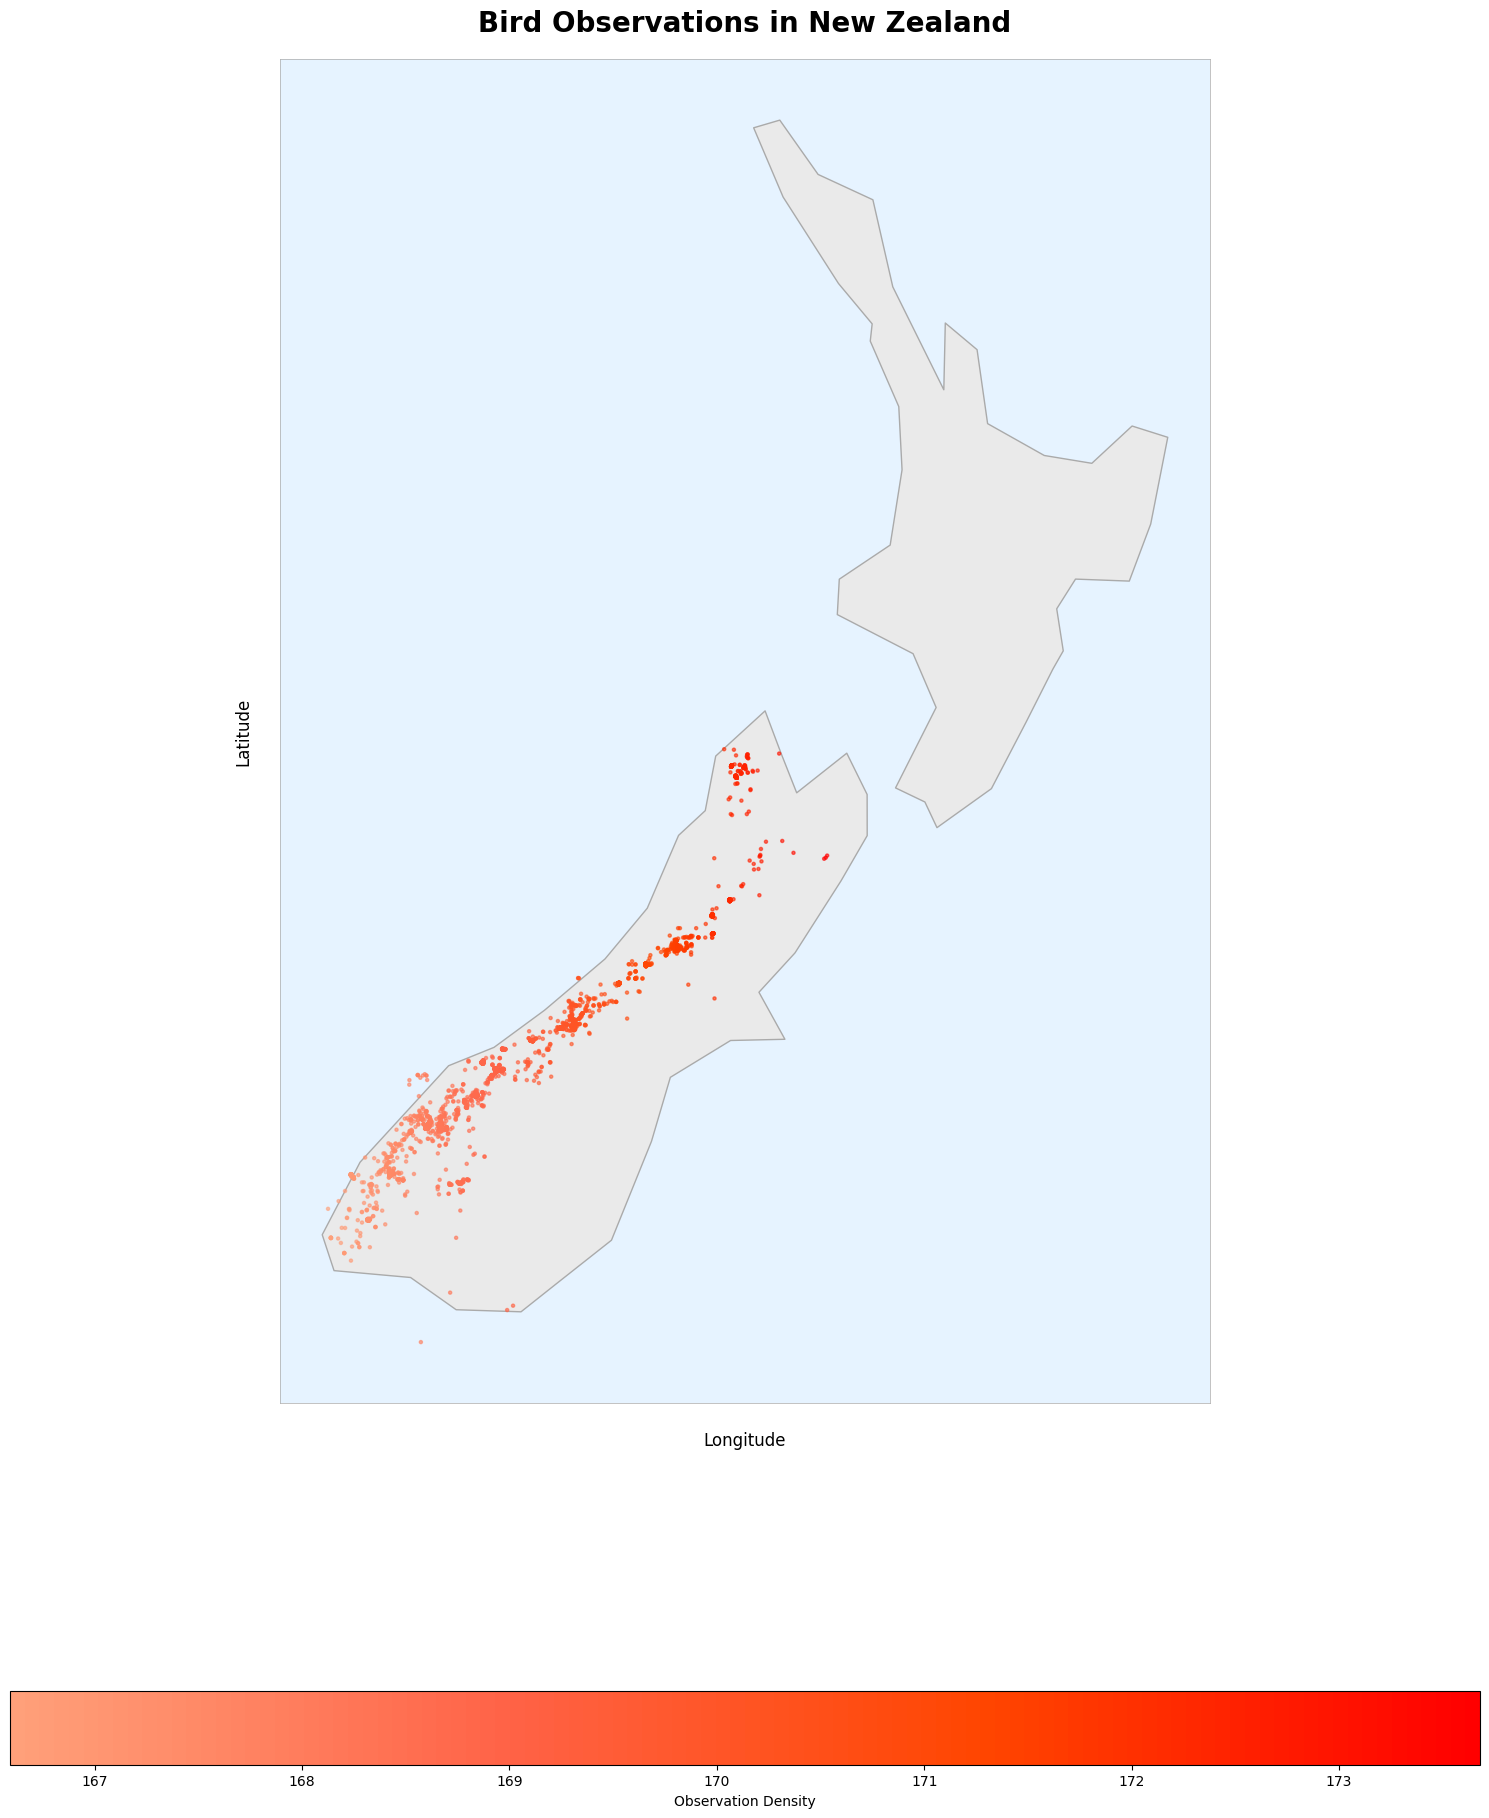

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Load world map data and filter for New Zealand
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nz = world[world.name == "New Zealand"]

# Convert filtered_final_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_final_data, 
    geometry=gpd.points_from_xy(filtered_final_data.LONGITUDE, filtered_final_data.LATITUDE),
    crs="EPSG:4326"
)

# Create custom color map for points
colors = ["#FFA07A", "#FF6347", "#FF4500", "#FF0000"]  # Light salmon to red
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 20))

# Set background color for water
ax.set_facecolor("#E6F3FF")  # Light blue for water

# Plot New Zealand map
nz.plot(ax=ax, color='#EAEAEA', edgecolor='#AAAAAA')

# Plot observation points with color gradient based on density
gdf.plot(ax=ax, alpha=0.6, markersize=5, cmap=cmap, legend=True, 
         legend_kwds={'label': "Observation Density", 'orientation': "horizontal"},
         column=gdf.geometry.x)  # Using x coordinate for demo; ideally use actual density

# Set plot title and labels
plt.title('Bird Observations in New Zealand', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Longitude', fontsize=12, labelpad=20)
plt.ylabel('Latitude', fontsize=12, labelpad=20)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Add a thin border around the map
for spine in ax.spines.values():
    spine.set_edgecolor('#AAAAAA')
    spine.set_linewidth(0.5)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('nz_bird_observations_map.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

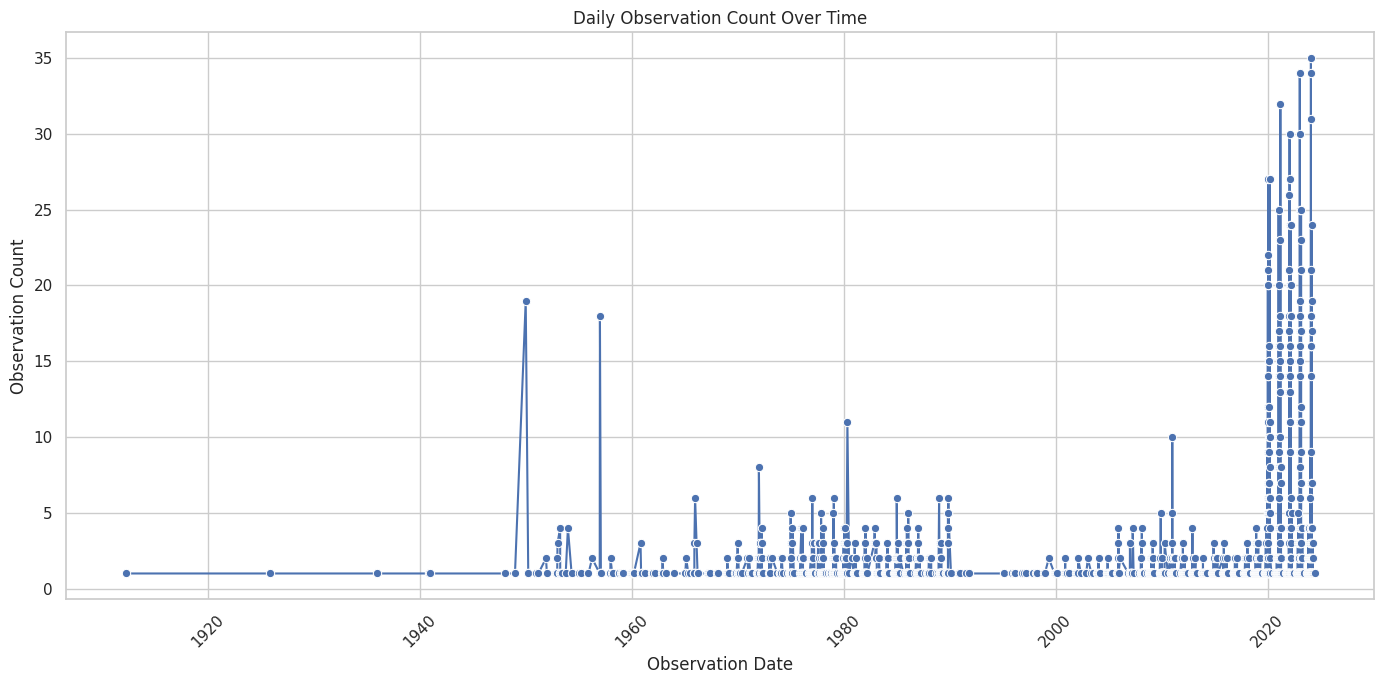

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经加载了数据到 filtered_final_data
# 将 OBSERVATION DATE 列转换为日期格式
filtered_final_data['OBSERVATION DATE'] = pd.to_datetime(filtered_final_data['OBSERVATION DATE'])

# 按日期分组并计算 OBSERVATION COUNT
daily_counts = filtered_final_data.groupby('OBSERVATION DATE').size().reset_index(name='OBSERVATION COUNT')

# 设置绘图风格
sns.set(style='whitegrid')

# 绘制时间序列图
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, x='OBSERVATION DATE', y='OBSERVATION COUNT', marker='o')
plt.title('Daily Observation Count Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局以适应标签
plt.show()

# zach bird

In [41]:
# 读取数据
file_path = 'gbif_nz_snow_wren.csv'
data2 = pd.read_csv(file_path, sep='\t')  # 根据文件的分隔符进行调整

In [42]:
# 查看前几行
print(data2.head())

      gbifID                            datasetKey  \
0  977205778  4fa7b334-ce0d-4e88-aaae-2e0c138d049e   
1  976924999  4fa7b334-ce0d-4e88-aaae-2e0c138d049e   
2  964538944  4fa7b334-ce0d-4e88-aaae-2e0c138d049e   
3  964226612  4fa7b334-ce0d-4e88-aaae-2e0c138d049e   
4  962468066  4fa7b334-ce0d-4e88-aaae-2e0c138d049e   

                            occurrenceID   kingdom    phylum class  \
0     URN:catalog:CLO:EBIRD:OBS225716267  Animalia  Chordata  Aves   
1  URN:catalog:CLO:EBIRD_NZ:OBS224521212  Animalia  Chordata  Aves   
2     URN:catalog:CLO:EBIRD:OBS209872557  Animalia  Chordata  Aves   
3  URN:catalog:CLO:EBIRD_NZ:OBS209588518  Animalia  Chordata  Aves   
4     URN:catalog:CLO:EBIRD:OBS207823760  Animalia  Chordata  Aves   

           order           family    genus               species  ...  \
0  Passeriformes  Acanthisittidae  Xenicus  Xenicus gilviventris  ...   
1  Passeriformes  Acanthisittidae  Xenicus  Xenicus gilviventris  ...   
2  Passeriformes  Acanthisittidae  

In [43]:
# 查看数据类型和缺失值
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            2477 non-null   int64  
 1   datasetKey                        2477 non-null   object 
 2   occurrenceID                      2458 non-null   object 
 3   kingdom                           2477 non-null   object 
 4   phylum                            2477 non-null   object 
 5   class                             2477 non-null   object 
 6   order                             2477 non-null   object 
 7   family                            2477 non-null   object 
 8   genus                             2477 non-null   object 
 9   species                           2477 non-null   object 
 10  infraspecificEpithet              0 non-null      float64
 11  taxonRank                         2477 non-null   object 
 12  scient

In [44]:
# 查看 species 列的唯一值
unique_species = data2['species'].unique()
print("Unique species values:\n", unique_species)

# 查看 countryCode 列的唯一值
unique_country_codes = data2['countryCode'].unique()
print("Unique countryCode values:\n", unique_country_codes)

Unique species values:
 ['Xenicus gilviventris']
Unique countryCode values:
 ['NZ']


In [45]:
# 保留指定的列
columns_to_keep2 = ['locality', 'stateProvince', 'individualCount', 'decimalLatitude', 
                   'decimalLongitude', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 
                   'elevation', 'elevationAccuracy', 'eventDate', 'day', 'month', 'year', 'issue']

data2_filtered = data2[columns_to_keep2]

# 查看保留列后的数据
data2_filtered.head()


,locality,stateProvince,individualCount,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,eventDate,day,month,year,issue
0,Prince of Wales,Otago,2.0,-44.767395,168.65302,NaN,NaN,NaN,NaN,2013-11-15,15.0,11.0,2013.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
1,Fiordland NP--east Homer Tunnel,Southland,NaN,-44.764200,167.98690,NaN,NaN,NaN,NaN,2011-11-10,10.0,11.0,2011.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
2,Fiordland NP--east Homer Tunnel,Southland,1.0,-44.764200,167.98690,NaN,NaN,NaN,NaN,2009-12-19,19.0,12.0,2009.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
3,Fiordland NP--east Homer Tunnel,Southland,2.0,-44.764200,167.98690,NaN,NaN,NaN,NaN,2002-10-30,30.0,10.0,2002.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
4,Fiordland NP--Kepler Track (Te Anau end),Southland,NaN,-45.440190,167.68555,NaN,NaN,NaN,NaN,2004-11-17,17.0,11.0,2004.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


In [46]:
missing_values2 = data2_filtered.isnull().sum()
print(missing_values2)

locality                          263
stateProvince                      32
individualCount                  1291
decimalLatitude                    21
decimalLongitude                   21
coordinateUncertaintyInMeters    2222
coordinatePrecision              2477
elevation                        2477
elevationAccuracy                2477
eventDate                           3
day                                20
month                               4
year                                3
issue                              16
dtype: int64


In [47]:
# 只保留 individualCount、decimalLatitude 和 decimalLongitude 不为空的行
data2_filtered_cleaned = data2_filtered.dropna(subset=['individualCount', 'decimalLatitude', 'decimalLongitude'])

# 查看处理后的数据
data2_filtered_cleaned.head()

,locality,stateProvince,individualCount,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,eventDate,day,month,year,issue
0,Prince of Wales,Otago,2.0,-44.767395,168.65302,NaN,NaN,NaN,NaN,2013-11-15,15.0,11.0,2013.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
2,Fiordland NP--east Homer Tunnel,Southland,1.0,-44.764200,167.98690,NaN,NaN,NaN,NaN,2009-12-19,19.0,12.0,2009.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
3,Fiordland NP--east Homer Tunnel,Southland,2.0,-44.764200,167.98690,NaN,NaN,NaN,NaN,2002-10-30,30.0,10.0,2002.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
5,Peak 1878 North Branch,Otago,1.0,-44.600880,168.23462,NaN,NaN,NaN,NaN,2011-01-01,1.0,1.0,2011.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
6,North Branch,Otago,1.0,-44.687897,168.18564,NaN,NaN,NaN,NaN,2011-01-01,1.0,1.0,2011.0,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


In [48]:
missing_values3 = data2_filtered_cleaned.isnull().sum()
print(missing_values3)

locality                            3
stateProvince                       1
individualCount                     0
decimalLatitude                     0
decimalLongitude                    0
coordinateUncertaintyInMeters    1150
coordinatePrecision              1165
elevation                        1165
elevationAccuracy                1165
eventDate                           1
day                                 1
month                               1
year                                1
issue                              16
dtype: int64


In [49]:
# 查看 individualCount 列的唯一值
unique_individual_count = data2_filtered_cleaned['individualCount'].unique()
print("Unique individualCount values:\n", unique_individual_count)

Unique individualCount values:
 [ 2.  1.  4.  7.  8.  6.  5.  3. 12. 22. 15. 19. 18. 14. 10. 13.]


In [50]:
# 只保留指定的列
columns_to_keep_final = ['locality', 'stateProvince', 'individualCount', 'decimalLatitude', 
                         'decimalLongitude', 'eventDate', 'issue']

data2_final = data2_filtered_cleaned[columns_to_keep_final]

# 查看处理后的数据
data2_final.head()

,locality,stateProvince,individualCount,decimalLatitude,decimalLongitude,eventDate,issue
0,Prince of Wales,Otago,2.0,-44.767395,168.65302,2013-11-15,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
2,Fiordland NP--east Homer Tunnel,Southland,1.0,-44.764200,167.98690,2009-12-19,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
3,Fiordland NP--east Homer Tunnel,Southland,2.0,-44.764200,167.98690,2002-10-30,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
5,Peak 1878 North Branch,Otago,1.0,-44.600880,168.23462,2011-01-01,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
6,North Branch,Otago,1.0,-44.687897,168.18564,2011-01-01,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


# combine

In [80]:
print(filtered_final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COMMON NAME        3854 non-null   object        
 1   OBSERVATION COUNT  3854 non-null   float64       
 2   STATE              3854 non-null   object        
 3   STATE CODE         3854 non-null   object        
 4   COUNTY             3778 non-null   object        
 5   COUNTY CODE        3778 non-null   object        
 6   LOCALITY           3854 non-null   object        
 7   LOCALITY ID        3854 non-null   object        
 8   LOCALITY TYPE      3854 non-null   object        
 9   LATITUDE           3854 non-null   float64       
 10  LONGITUDE          3854 non-null   float64       
 11  OBSERVATION DATE   3854 non-null   datetime64[ns]
 12  GROUP IDENTIFIER   147 non-null    object        
 13  APPROVED           3854 non-null   int64         
 14  SPECIES 

In [53]:
# 查看 eventDate 列的数据类型
event_date_dtype = data2_final['eventDate'].dtype
print("eventDate column data type:", event_date_dtype)

# 查看 eventDate 列的前几行数据
event_date_samples = data2_final['eventDate'].head()
print("Sample values from eventDate column:\n", event_date_samples)

eventDate column data type: object
Sample values from eventDate column:
 0    2013-11-15
2    2009-12-19
3    2002-10-30
5    2011-01-01
6    2011-01-01
Name: eventDate, dtype: object


In [52]:
print(data2_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, 0 to 2459
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          1162 non-null   object 
 1   stateProvince     1164 non-null   object 
 2   individualCount   1165 non-null   float64
 3   decimalLatitude   1165 non-null   float64
 4   decimalLongitude  1165 non-null   float64
 5   eventDate         1164 non-null   object 
 6   issue             1149 non-null   object 
dtypes: float64(3), object(4)
memory usage: 72.8+ KB
None


In [73]:
# 检查 eventDate 列的缺失值数量
missing_event_dates = data2_final['eventDate'].isnull().sum()
print("Number of missing values in eventDate column:", missing_event_dates)

Number of missing values in eventDate column: 1


In [74]:
# 将 'X' 替换为 1，其他非数值值可以设置为 NaN
filtered_final_data['OBSERVATION COUNT'] = filtered_final_data['OBSERVATION COUNT'].replace('X', 1)

In [75]:
# 将 filtered_final_data 中的 OBSERVATION COUNT 列转换为浮点型
filtered_final_data.loc[:, 'OBSERVATION COUNT'] = filtered_final_data['OBSERVATION COUNT'].astype(float)

# 将 data2_final 中的 individualCount 列转换为浮点型
data2_final.loc[:, 'individualCount'] = data2_final['individualCount'].astype(float)

In [78]:
# 将 eventDate 列转换为 datetime64[ns] 类型
data2_final.loc[:, 'eventDate'] = pd.to_datetime(data2_final['eventDate'], errors='coerce')

# 确保在拼接之前对 data2_final_renamed 中的列进行重命名
data2_final_renamed = data2_final.rename(columns={
    'locality': 'LOCALITY',
    'stateProvince': 'STATE',
    'individualCount': 'OBSERVATION COUNT',
    'decimalLatitude': 'LATITUDE',
    'decimalLongitude': 'LONGITUDE',
    'eventDate': 'OBSERVATION DATE',
    'issue': 'SPECIES COMMENTS'
})

# 使用 pd.concat 进行行拼接
# 这里需要确保列名一致
merged_data = pd.concat([filtered_final_data, data2_final_renamed], ignore_index=True)

# 查看拼接后的数据
merged_data.head()

,COMMON NAME,OBSERVATION COUNT,STATE,STATE CODE,COUNTY,COUNTY CODE,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,GROUP IDENTIFIER,APPROVED,SPECIES COMMENTS
0,South Island Wren,1.0,Canterbury,NZ-CAN,Hurunui District,NZ-CAN-058,"Edwards Valley, gullies on west side above bus...",L1491033,P,-42.379773,172.717237,1966-02-13,NaN,1.0,Data from Michelsen-Heath & Gaze 2007
1,South Island Wren,1.0,Canterbury,NZ-CAN,Hurunui District,NZ-CAN-058,"Close to lake Thompson, Head of the Waiau Valley",L1491411,P,-42.116521,172.640764,1979-01-03,NaN,1.0,Data from Michelsen-Heath & Gaze 2007
2,South Island Wren,1.0,Canterbury,NZ-CAN,Hurunui District,NZ-CAN-058,"Technical/ Norma ridge, 4200'-5300', alpine sc...",L1491447,P,-42.420664,172.350062,1979-10-01,NaN,1.0,Data from Michelsen-Heath & Gaze 2007
3,South Island Wren,1.0,Canterbury,NZ-CAN,Hurunui District,NZ-CAN-058,"Mt. Gloriana, Spencer Mts",L1491580,P,-42.266187,172.487281,1981-01-15,NaN,1.0,Data from Michelsen-Heath & Gaze 2007
4,South Island Wren,1.0,Canterbury,NZ-CAN,Hurunui District,NZ-CAN-058,rock bivouac,L2128598,P,-42.110932,172.704370,2013-03-29,NaN,1.0,NaN


In [81]:
print(data2_final_renamed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, 0 to 2459
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LOCALITY           1162 non-null   object        
 1   STATE              1164 non-null   object        
 2   OBSERVATION COUNT  1165 non-null   float64       
 3   LATITUDE           1165 non-null   float64       
 4   LONGITUDE          1165 non-null   float64       
 5   OBSERVATION DATE   1164 non-null   datetime64[ns]
 6   SPECIES COMMENTS   1149 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 72.8+ KB
None


In [82]:
print(filtered_final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COMMON NAME        3854 non-null   object        
 1   OBSERVATION COUNT  3854 non-null   float64       
 2   STATE              3854 non-null   object        
 3   STATE CODE         3854 non-null   object        
 4   COUNTY             3778 non-null   object        
 5   COUNTY CODE        3778 non-null   object        
 6   LOCALITY           3854 non-null   object        
 7   LOCALITY ID        3854 non-null   object        
 8   LOCALITY TYPE      3854 non-null   object        
 9   LATITUDE           3854 non-null   float64       
 10  LONGITUDE          3854 non-null   float64       
 11  OBSERVATION DATE   3854 non-null   datetime64[ns]
 12  GROUP IDENTIFIER   147 non-null    object        
 13  APPROVED           3854 non-null   int64         
 14  SPECIES 

In [79]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COMMON NAME        3854 non-null   object        
 1   OBSERVATION COUNT  5019 non-null   float64       
 2   STATE              5018 non-null   object        
 3   STATE CODE         3854 non-null   object        
 4   COUNTY             3778 non-null   object        
 5   COUNTY CODE        3778 non-null   object        
 6   LOCALITY           5016 non-null   object        
 7   LOCALITY ID        3854 non-null   object        
 8   LOCALITY TYPE      3854 non-null   object        
 9   LATITUDE           5019 non-null   float64       
 10  LONGITUDE          5019 non-null   float64       
 11  OBSERVATION DATE   5018 non-null   datetime64[ns]
 12  GROUP IDENTIFIER   147 non-null    object        
 13  APPROVED           3854 non-null   float64       
 14  SPECIES 

In [83]:
# 查看 merged_data 中各列的缺失值数量
missing_values = merged_data.isnull().sum()
print(missing_values)

COMMON NAME          1165
OBSERVATION COUNT       0
STATE                   1
STATE CODE           1165
COUNTY               1241
COUNTY CODE          1241
LOCALITY                3
LOCALITY ID          1165
LOCALITY TYPE        1165
LATITUDE                0
LONGITUDE               0
OBSERVATION DATE        1
GROUP IDENTIFIER     4872
APPROVED             1165
SPECIES COMMENTS     2553
dtype: int64


In [85]:
bird_data = merged_data[merged_data['OBSERVATION DATE'].notnull()]

In [86]:
print(bird_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5018 entries, 0 to 5018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COMMON NAME        3854 non-null   object        
 1   OBSERVATION COUNT  5018 non-null   float64       
 2   STATE              5017 non-null   object        
 3   STATE CODE         3854 non-null   object        
 4   COUNTY             3778 non-null   object        
 5   COUNTY CODE        3778 non-null   object        
 6   LOCALITY           5016 non-null   object        
 7   LOCALITY ID        3854 non-null   object        
 8   LOCALITY TYPE      3854 non-null   object        
 9   LATITUDE           5018 non-null   float64       
 10  LONGITUDE          5018 non-null   float64       
 11  OBSERVATION DATE   5018 non-null   datetime64[ns]
 12  GROUP IDENTIFIER   147 non-null    object        
 13  APPROVED           3854 non-null   float64       
 14  SPECIES COMME

In [87]:
bird_data.to_csv('bird_data.csv', index=False)